A Weather Prediction Project Using Linear Regression

In [464]:
#from google.colab import drive
#drive.mount("/content/drive")

In [465]:
!pip install pandas numpy scikit-learn matplotlib seaborn tensorflow streamlit

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [466]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [468]:
#df1 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet bangladesh 2022-05-01 to 2025-01-23.csv')
#df2 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2019-09-05 to 2022-05-30.csv')
#df3 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2016-12-11 to 2019-09-05.csv')
#df4 = pd.read_csv('/content/drive/MyDrive/Weather Dataset/sylhet, bangladesh 2014-03-20 to 2016-12-12.csv')


In [469]:
#sylhet_weather_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
#sylhet_weather_df.to_csv('sylhet_weather.csv', index=False)

In [470]:
#from google.colab import files
#files.download('sylhet_weather.csv')

In [471]:
df = pd.read_csv('..\Data\sylhet_weather.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\USER\AppData\Local\Temp\ipykernel_22112\1746279886.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('..\Data\sylhet_weather.csv')


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,sylhet bangladesh,2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,...,18.6,8,30.0,2022-05-01T05:17:15,2022-05-01T18:22:24,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
1,sylhet bangladesh,2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,...,16.5,7,30.0,2022-05-02T05:16:31,2022-05-02T18:22:53,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999"
2,sylhet bangladesh,2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,...,17.9,7,30.0,2022-05-03T05:15:48,2022-05-03T18:23:23,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
3,sylhet bangladesh,2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,...,19.5,8,30.0,2022-05-04T05:15:07,2022-05-04T18:23:53,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999"
4,sylhet bangladesh,2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,...,23.0,8,30.0,2022-05-05T05:14:26,2022-05-05T18:24:23,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42618099999,42515099999,remote,42516099999"


In [472]:
print(df.isnull().sum())
print('\n')
print(df.duplicated().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1342
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            18
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2997
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


1


In [473]:
df.shape

(3996, 33)

In [474]:
df['preciptype'].value_counts()

preciptype
rain    2654
Name: count, dtype: int64

In [475]:
df = df.drop(['severerisk'], axis=1)

In [476]:
df.shape

(3996, 32)

In [477]:
df = df.drop_duplicates(subset=['datetime'])

In [478]:
df.shape

(3963, 32)

In [479]:
print(df.isnull().sum())
print('\n')
print(df.duplicated().sum())

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1340
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            18
solarradiation         0
solarenergy            0
uvindex                0
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64


0


In [480]:
df['visibility'].value_counts().sort_index()

visibility
0.7       1
0.9       2
1.0       1
1.1       1
1.2       4
         ..
22.7      1
23.2      1
23.3      1
24.1      5
1101.4    1
Name: count, Length: 188, dtype: int64

In [481]:
df['visibility'] = df['visibility'].ffill()

In [482]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy    1509
Rain, Overcast            1043
Clear                      743
Partially cloudy           592
Rain                        69
Overcast                     7
Name: count, dtype: int64

In [483]:
df['conditions'] = df['conditions'].replace({
    'Rain': 'Rain, Partially cloudy',
    'Overcast': 'Rain, Overcast'
})

In [484]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy    1578
Rain, Overcast            1050
Clear                      743
Partially cloudy           592
Name: count, dtype: int64

In [485]:
df['description'].value_counts()

description
Clear conditions throughout the day.                                             738
Partly cloudy throughout the day.                                                523
Partly cloudy throughout the day with a chance of rain throughout the day.       379
Cloudy skies throughout the day with a chance of rain throughout the day.        314
Partly cloudy throughout the day with afternoon rain.                            306
Partly cloudy throughout the day with rain.                                      260
Cloudy skies throughout the day with rain in the morning and afternoon.          206
Cloudy skies throughout the day with rain.                                       193
Partly cloudy throughout the day with late afternoon rain.                       176
Partly cloudy throughout the day with morning rain.                              152
Cloudy skies throughout the day with afternoon rain.                             151
Cloudy skies throughout the day with morning rain.   

In [486]:
def categorize_weather(description):
    description = description.lower()

    if 'rain' in description or 'drizzle' in description or 'showers' in description:
        return 'rainy'
    elif 'overcast' in description:
        return 'overcast'
    elif 'cloudy' in description or 'partly cloudy' in description:
        return 'cloudy'
    elif 'clear' in description or 'sunny' in description:
        return 'clear'
    else:
        return 'unknown'  # optional: handle uncategorized cases

df['categoryofweather'] = df['description'].apply(categorize_weather)

In [487]:
df['categoryofweather'].value_counts()

categoryofweather
rainy     2621
clear      780
cloudy     562
Name: count, dtype: int64

In [488]:
display(df.head())

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,categoryofweather
0,sylhet bangladesh,2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,...,18.6,8,2022-05-01T05:17:15,2022-05-01T18:22:24,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999",rainy
1,sylhet bangladesh,2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,...,16.5,7,2022-05-02T05:16:31,2022-05-02T18:22:53,0.05,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"42618099999,42515099999,remote,42516099999",rainy
2,sylhet bangladesh,2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,...,17.9,7,2022-05-03T05:15:48,2022-05-03T18:23:23,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999",rainy
3,sylhet bangladesh,2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,...,19.5,8,2022-05-04T05:15:07,2022-05-04T18:23:53,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"42618099999,42515099999,remote,42516099999",rainy
4,sylhet bangladesh,2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,...,23.0,8,2022-05-05T05:14:26,2022-05-05T18:24:23,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42618099999,42515099999,remote,42516099999",rainy


In [489]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
count,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,...,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,29.742998,19.038430,24.205501,33.936816,19.093641,26.070982,20.664194,82.080949,8.415468,66.136765,...,24.541509,9.827479,121.746404,1009.050896,56.595786,6.946076,174.373782,15.050568,6.555640,0.483987
std,3.404102,5.471891,4.181000,6.852786,5.607800,6.108550,4.808248,7.359500,18.164307,47.330435,...,8.273833,6.828476,97.134362,5.115979,33.555014,18.240000,58.533320,5.062207,1.802914,0.288690
min,18.100000,3.400000,12.400000,18.100000,2.600000,12.400000,8.300000,51.900000,0.000000,0.000000,...,8.600000,3.600000,0.000000,992.600000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000
25%,27.400000,14.900000,21.100000,27.900000,14.900000,21.050000,16.400000,77.200000,0.000000,0.000000,...,19.100000,7.100000,52.300000,1004.900000,24.700000,3.300000,141.000000,12.150000,6.000000,0.250000
50%,30.100000,19.700000,25.300000,33.900000,19.700000,26.200000,22.000000,82.400000,0.900000,100.000000,...,22.300000,7.600000,84.600000,1009.400000,59.600000,4.100000,179.700000,15.500000,7.000000,0.500000
75%,32.200000,23.800000,27.500000,39.600000,23.800000,30.800000,25.100000,87.500000,9.000000,100.000000,...,27.700000,10.900000,170.650000,1013.300000,91.050000,5.800000,212.700000,18.400000,8.000000,0.750000
max,38.800000,28.800000,32.600000,53.600000,36.800000,43.200000,28.000000,98.400000,202.000000,100.000000,...,95.800000,91.600000,359.900000,1019.800000,100.000000,1101.400000,316.100000,27.400000,10.000000,0.980000


In [490]:
print("\nMissing Values in Dataset:\n", df.isnull().sum())


Missing Values in Dataset:
 name                    0
datetime                0
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype           1340
snow                    0
snowdepth               0
windgust                0
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy             0
uvindex                 0
sunrise                 0
sunset                  0
moonphase               0
conditions              0
description             0
icon                    0
stations                0
categoryofweather       0
dtype: int64


In [491]:
df['preciptype'] = df['preciptype'].fillna('clear')

In [492]:
df['preciptype'].value_counts()

preciptype
rain     2623
clear    1340
Name: count, dtype: int64

In [493]:
#sns.pairplot(df, hue='temp')
#plt.show()

In [494]:
#df.to_csv('cleaned_df.csv', index=False)

In [495]:
#from google.colab import files
#iles.download('cleaned_df.csv')

In [496]:
df.set_index("datetime", inplace=True)

In [497]:
df.index

Index(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10',
       ...
       '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04', '2016-12-05',
       '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-10'],
      dtype='object', name='datetime', length=3963)

In [498]:
df.index = pd.to_datetime(df.index)

In [499]:
df.index

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10',
               ...
               '2016-12-01', '2016-12-02', '2016-12-03', '2016-12-04',
               '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
               '2016-12-09', '2016-12-10'],
              dtype='datetime64[ns]', name='datetime', length=3963, freq=None)

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3963 entries, 2022-05-01 to 2016-12-10
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3963 non-null   object 
 1   tempmax            3963 non-null   float64
 2   tempmin            3963 non-null   float64
 3   temp               3963 non-null   float64
 4   feelslikemax       3963 non-null   float64
 5   feelslikemin       3963 non-null   float64
 6   feelslike          3963 non-null   float64
 7   dew                3963 non-null   float64
 8   humidity           3963 non-null   float64
 9   precip             3963 non-null   float64
 10  precipprob         3963 non-null   int64  
 11  precipcover        3963 non-null   float64
 12  preciptype         3963 non-null   object 
 13  snow               3963 non-null   int64  
 14  snowdepth          3963 non-null   float64
 15  windgust           3963 non-null   float64
 16  windsp

In [501]:
df.index.year.value_counts().sort_index()

datetime
2014    287
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     23
Name: count, dtype: int64

In [502]:
df = df.drop(['name','stations','sunrise','sunset', 'description'], axis=1)

In [503]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,conditions,icon,categoryofweather
datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,22.0,100,...,1006.0,57.3,18.8,215.7,18.6,8,0.00,"Rain, Partially cloudy",rain,rainy
2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,20.0,100,...,1007.1,59.1,18.8,193.6,16.5,7,0.05,"Rain, Partially cloudy",rain,rainy
2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,0.2,100,...,1007.7,66.5,18.2,204.9,17.9,7,0.08,"Rain, Partially cloudy",rain,rainy
2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,8.0,100,...,1009.1,52.7,19.0,226.2,19.5,8,0.11,"Rain, Partially cloudy",rain,rainy
2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,12.0,100,...,1007.7,45.3,18.7,263.0,23.0,8,0.14,"Rain, Partially cloudy",rain,rainy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-06,29.6,13.1,20.6,29.0,13.1,20.5,14.1,69.0,0.0,0,...,1015.1,0.0,4.1,183.4,15.9,7,0.23,Clear,clear-day,clear
2016-12-07,28.5,14.2,20.9,28.2,14.2,20.8,14.3,68.4,0.0,0,...,1013.8,0.0,4.2,182.6,15.9,7,0.25,Clear,clear-day,clear
2016-12-08,28.8,14.0,20.5,28.5,14.0,20.5,14.2,69.7,0.0,0,...,1012.8,0.0,4.7,182.2,15.9,7,0.30,Clear,clear-day,clear


In [504]:
df['icon'] = df['icon'].replace({
    'cloudy': 'partly-cloudy-day',
    'fog': 'partly-cloudy-day',
    'wind': 'partly-cloudy-day'
})

In [505]:
df['icon'].value_counts()

icon
rain                 2621
clear-day             737
partly-cloudy-day     605
Name: count, dtype: int64

In [506]:
df.dtypes

tempmax              float64
tempmin              float64
temp                 float64
feelslikemax         float64
feelslikemin         float64
feelslike            float64
dew                  float64
humidity             float64
precip               float64
precipprob             int64
precipcover          float64
preciptype            object
snow                   int64
snowdepth            float64
windgust             float64
windspeed            float64
winddir              float64
sealevelpressure     float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex                int64
moonphase            float64
conditions            object
icon                  object
categoryofweather     object
dtype: object

In [507]:
from sklearn.preprocessing import LabelEncoder
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [508]:
label_encoders = {}

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

For predicting weather condition

In [509]:
x = df.drop('conditions', axis=1)

In [510]:
y = df['conditions']

In [511]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [512]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [513]:
x_train.shape, x_test.shape,

((3170, 26), (793, 26))

In [514]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [515]:
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [516]:
y_pred_dt = dt_model.predict(x_test)

In [517]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [518]:
accuracy_score(y_test, y_pred_dt)

1.0

Text(50.722222222222214, 0.5, 'Truth')

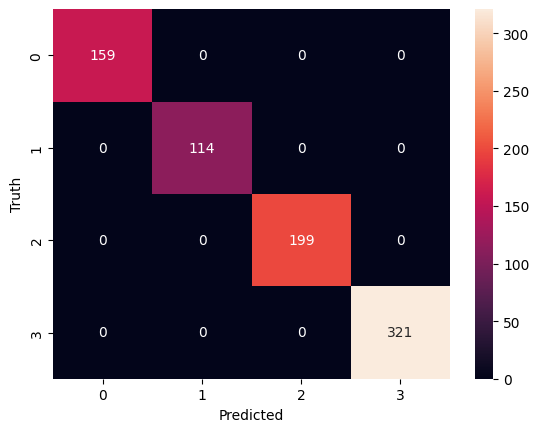

In [519]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [520]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [521]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model =LogisticRegression()
nb_model = GaussianNB()

In [522]:
model_list = [dt_model, rf_model, svc_model,knn_model,lr_model,nb_model]

In [523]:
acc_list = []
for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

In [524]:
acc_list

[1.0,
 0.9987389659520807,
 0.9722572509457755,
 0.905422446406053,
 0.9911727616645649,
 0.7692307692307693]

In [525]:
model_df = pd.DataFrame({'Model': ['Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Logistic Regression', 'Naive Bayes'], 'Accuracy': acc_list})
model_df

,Model,Accuracy
0,Decision Tree,1.000000
1,Random Forest,0.998739
2,SVC,0.972257
3,KNN,0.905422
4,Logistic Regression,0.991173
5,Naive Bayes,0.769231


In [526]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, x, y, cv=5)
print('Cross Validation Score = ', scores)

Cross Validation Score =  [0.99747793 1.         1.         0.99873737 0.99621212]


For predicting temperature

In [527]:
df['templag1'] = df['temp'].shift(-1)

In [528]:
df = df.ffill()

In [529]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)

In [530]:
predictors = df.columns[~df.columns.isin(['templag1'])]

In [531]:
def backtest(df, model, predictors, start=50, step=10):
    all_predictions = []
    for i in range(start, df.shape[0], step):
        train = df.iloc[:i,:]
        test = df.iloc[i:(i+step):]

        model.fit(train[predictors], train['templag1'])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test['templag1'], preds], axis=1)
        combined.columns = ['templag1','predictions']

        combined["difference"] = (combined['predictions'] - combined['templag1']).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [532]:
predictions = backtest(df, rr, predictors)

In [533]:
predictions

,templag1,predictions,difference
datetime,,,
2022-06-20,25.4,25.992697,0.592697
2022-06-21,26.0,25.286198,0.713802
2022-06-22,26.3,26.408797,0.108797
2022-06-23,26.2,25.549304,0.650696
2022-06-24,26.7,26.348482,0.351518
...,...,...,...
2016-12-06,20.9,20.363057,0.536943
2016-12-07,20.5,20.692799,0.192799
2016-12-08,19.4,20.363111,0.963111


In [534]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions['templag1'], predictions['predictions'])

0.754356605443607

In [535]:
predictions.sort_values("difference", ascending=False)

,templag1,predictions,difference
datetime,,,
2025-01-07,18.1,72.873715,54.773715
2025-01-23,29.0,18.037536,10.962464
2022-04-30,18.5,24.486968,5.986968
2019-09-04,23.3,28.857289,5.557289
2022-10-02,26.0,31.095831,5.095831
...,...,...,...
2023-04-12,27.0,27.001755,0.001755
2022-03-04,19.5,19.501746,0.001746
2015-06-23,26.9,26.898944,0.001056


In [536]:
def pct_diff(old, new):
  return (new-old)/old

def compute_rolling(df, horizon, col):
  label = f"rolling_{horizon}_{col}"

  df[label] = df[col].rolling(horizon).mean()
  df[f"{label}_pct"] = pct_diff(df[label], df[col])
  return df

rolling_horizons = [3, 7]
for horizon in rolling_horizons:
  for col in ['tempmax', 'tempmin','temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
              'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed',
              'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
              'moonphase', 'conditions','icon', 'categoryofweather']:
    df = compute_rolling(df, horizon, col)


C:\Users\USER\AppData\Local\Temp\ipykernel_22112\3978505547.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[label] = df[col].rolling(horizon).mean()
C:\Users\USER\AppData\Local\Temp\ipykernel_22112\3978505547.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{label}_pct"] = pct_diff(df[label], df[col])
C:\Users\USER\AppData\Local\Temp\ipykernel_22112\3978505547.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [537]:
df

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,rolling_7_uvindex,rolling_7_uvindex_pct,rolling_7_moonphase,rolling_7_moonphase_pct,rolling_7_conditions,rolling_7_conditions_pct,rolling_7_icon,rolling_7_icon_pct,rolling_7_categoryofweather,rolling_7_categoryofweather_pct
datetime,,,,,,,,,,,,,,,,,,,,,
2022-05-01,29.5,15.4,24.6,33.1,15.4,25.6,21.5,83.5,22.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02,27.8,16.4,23.1,30.7,16.4,23.6,20.7,86.6,20.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-03,29.1,17.1,24.3,32.3,17.1,24.8,21.0,82.7,0.2,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-04,29.9,15.1,24.1,33.3,15.1,25.2,21.1,84.0,8.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-05,31.2,15.9,25.0,35.4,15.9,26.4,21.7,82.9,12.0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-06,29.6,13.1,20.6,29.0,13.1,20.5,14.1,69.0,0.0,0,...,6.714286,0.042553,0.128571,0.788889,0.142857,-1.0,0.142857,-1.0,0.142857,-1.0
2016-12-07,28.5,14.2,20.9,28.2,14.2,20.8,14.3,68.4,0.0,0,...,6.714286,0.042553,0.160000,0.562500,0.142857,-1.0,0.142857,-1.0,0.142857,-1.0
2016-12-08,28.8,14.0,20.5,28.5,14.0,20.5,14.2,69.7,0.0,0,...,6.857143,0.020833,0.194286,0.544118,0.142857,-1.0,0.142857,-1.0,0.142857,-1.0


In [538]:
df = df.iloc[7:,:]

In [539]:
df.shape

(3956, 136)

In [540]:
df = df.fillna(0)

In [541]:
def expand_mean(df):
  return df.expanding (1).mean()


for col in ['tempmax', 'tempmin','temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
              'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed',
              'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
              'moonphase', 'conditions','icon', 'categoryofweather']:
  df[f"month_avg_{col}"] = df[col].groupby (df.index.month, group_keys=False).apply(expand_mean)
  df[f"day_avg_{col}"] = df[col].groupby (df.index.day_of_year, group_keys=False).apply(expand_mean)

C:\Users\USER\AppData\Local\Temp\ipykernel_22112\1275659452.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"month_avg_{col}"] = df[col].groupby (df.index.month, group_keys=False).apply(expand_mean)
C:\Users\USER\AppData\Local\Temp\ipykernel_22112\1275659452.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"day_avg_{col}"] = df[col].groupby (df.index.day_of_year, group_keys=False).apply(expand_mean)
C:\Users\USER\AppData\Local\Temp\ipykernel_22112\1275659452.py:9: PerformanceWarning: DataFrame is highly fragmente

In [542]:
predictors = df.columns[~df.columns.isin(['templag1'])]

In [543]:
predictions = backtest(df, rr, predictors)

In [544]:
predictions

,templag1,predictions,difference
datetime,,,
2022-06-27,26.1,26.181627,0.081627
2022-06-28,25.7,24.389061,1.310939
2022-06-29,25.9,24.298444,1.601556
2022-06-30,26.3,25.056681,1.243319
2022-07-01,28.5,25.910891,2.589109
...,...,...,...
2016-12-06,20.9,20.119630,0.780370
2016-12-07,20.5,20.332092,0.167908
2016-12-08,19.4,20.170467,0.770467


In [545]:
mean_absolute_error(predictions['templag1'], predictions['predictions'])

0.9753068679254964

In [546]:
predictions.sort_values("difference", ascending=False)

,templag1,predictions,difference
datetime,,,
2025-01-07,18.1,120.927433,102.827433
2025-01-09,17.5,-6.849881,24.349881
2025-01-08,17.6,-6.324725,23.924725
2022-11-01,25.8,5.964173,19.835827
2022-11-02,25.2,10.586026,14.613974
...,...,...,...
2024-09-14,27.8,27.798866,0.001134
2021-09-12,28.7,28.699467,0.000533
2018-12-08,18.5,18.499680,0.000320


In [547]:
predictions["difference"].round().value_counts().sort_index()

difference
0.0      1524
1.0      1722
2.0       453
3.0       111
4.0        38
5.0        15
6.0        12
7.0         8
8.0         9
9.0         3
11.0        2
12.0        4
15.0        1
20.0        1
24.0        2
103.0       1
Name: count, dtype: int64

<Axes: xlabel='difference'>

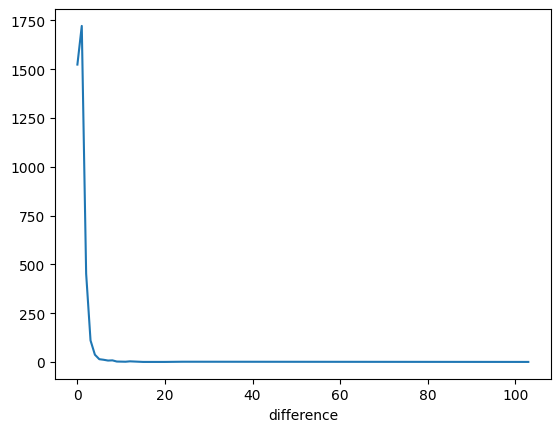

In [548]:
predictions["difference"].round().value_counts().sort_index().plot()

In [550]:
import joblib
import pickle

joblib.dump(rr,'temp_model.pkl')
joblib.dump(dt_model,'cond_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']